In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm

from src.series import ControlledInterventionSeries

In [2]:
"""
Forging some test data
"""

n = 100
split = int(n / 2)

control_series = pd.Series(norm(loc=10, scale=.5).rvs(n))
series = norm(loc=11, scale=.5).rvs(n)

series = pd.Series((series) + np.concatenate([np.zeros(split), np.ones(n - split) * .3]))

experiment = ControlledInterventionSeries(
    series, control_series, split
)

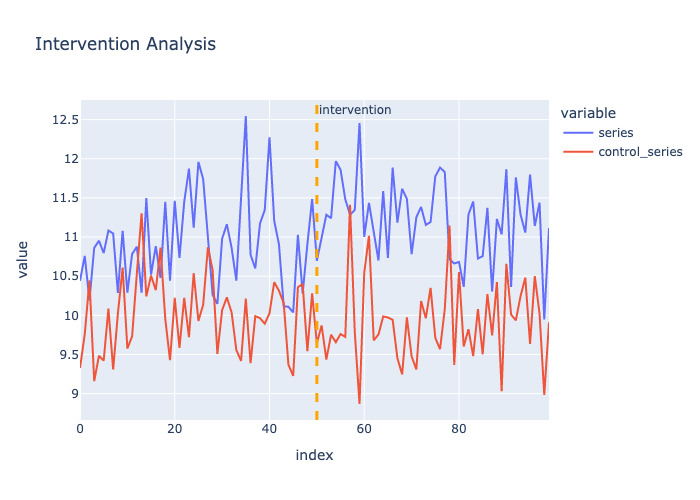

In [3]:
"""
Result is random noise with increase in mean after the intervention
"""
import plotly.io as pio
pio.renderers.default = "png"

experiment.plot()

In [4]:
"""
The report gives on overview of means and the results of different methods of Hypothesis testing
"""

experiment.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 10.929243549827472, After: 11.218828045926207

The means of control-series before and after intervention are
	Before: 10.005319046381818, After: 9.91104884687324

The mean difference of the series and control-series before and after is
	Before: 0.9239245034456536, After: 1.307779199052971.

The mean ratio of the series and control-series before and after is
	Before: 1.0945466284944954, After: 1.134990023826841.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 0.008147006816551472, Control Series: 0.35205089829866143, Difference: 0.009119634821134176, Ratio: 0.00877675059754353.

___________________
Rsults from ANCOVA:

           Source         SS  DF         F     p-unc       np2
0    intervention   2.134285   1  7.362142  0.007883  0.070544
1  control_series   0.042617   1  0.147005  0.702253  0.0

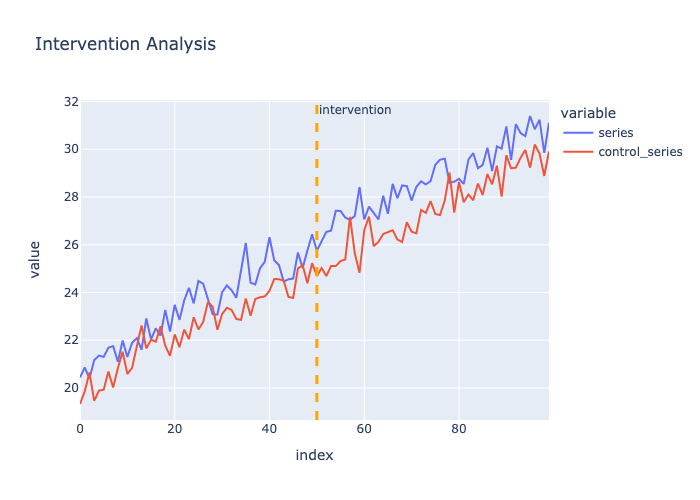

In [5]:
"""
Adding trend to the test data
"""

trend = np.linspace(10, 20, n)

series_trend = series + trend
control_series_trend = control_series + trend

experiment_trend = ControlledInterventionSeries(
    series_trend, control_series_trend, split
)

experiment_trend.plot()

In [6]:
experiment_trend.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 23.40399102457495, After: 28.744080571178735

The means of control-series before and after intervention are
	Before: 22.48006652112929, After: 27.436301372125758

The mean difference of the series and control-series before and after is
	Before: 0.9239245034456539, After: 1.307779199052971.

The mean ratio of the series and control-series before and after is
	Before: 1.0415942335198798, After: 1.0484866468233849.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 1.769578423950057e-31, Control Series: 2.1389848910406763e-28, Difference: 0.00911963482113425, Ratio: 0.25901365783277785.

___________________
Rsults from ANCOVA:

           Source          SS  DF           F         p-unc       np2
0    intervention    7.334345   1   15.123166  1.845048e-04  0.134880
1  control_series  187.395703   1  386.

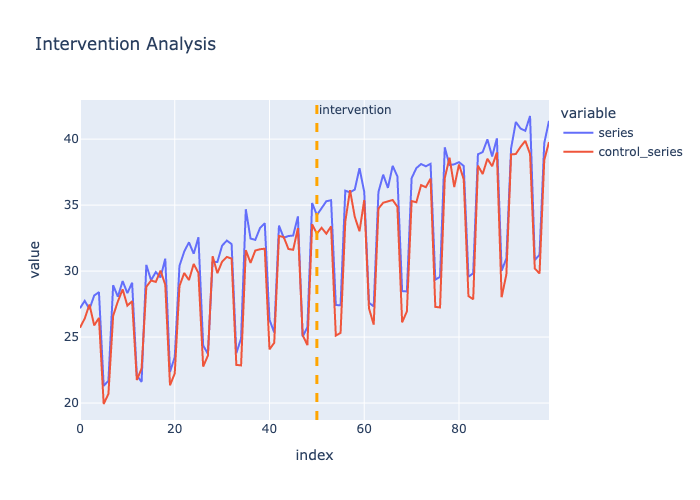

In [7]:
"""
Adding season to the test data
"""

cycle = np.array([1, 1, 1, 1, 1, 0, 0,])
season_flag = np.tile(cycle, int(n / len(cycle) + 1))[:n]
season_multiplier = season_flag * .33 + 1


series_season = series_trend * season_multiplier
control_series_season = control_series_trend * season_multiplier

experiment_season = ControlledInterventionSeries(
    series_season, control_series_season, split
)

experiment_season.plot()

In [8]:
experiment_season.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 28.937839039726097, After: 35.53627437945594

The means of control-series before and after intervention are
	Before: 27.794102542103804, After: 33.949921728634685

The mean difference of the series and control-series before and after is
	Before: 1.1437364976222901, After: 1.5863526508212564.

The mean ratio of the series and control-series before and after is
	Before: 1.0415942335198798, After: 1.0484866468233849.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 3.216304369131406e-12, Control Series: 4.162376018942386e-11, Difference: 0.013473946241024846, Ratio: 0.25901365783277797.

___________________
Rsults from ANCOVA:

           Source           SS  DF            F         p-unc       np2
0    intervention     5.283167   1     6.831607  1.038275e-02  0.065795
1  control_series  1612.051439   

In [9]:
"""
Same with adding season flag as covariate for ANCOVA
"""

ControlledInterventionSeries(
    series_season, control_series_season, split, covariates=[season_flag]
).report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 28.937839039726097, After: 35.53627437945594

The means of control-series before and after intervention are
	Before: 27.794102542103804, After: 33.949921728634685

The mean difference of the series and control-series before and after is
	Before: 1.1437364976222901, After: 1.5863526508212564.

The mean ratio of the series and control-series before and after is
	Before: 1.0415942335198798, After: 1.0484866468233849.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 3.216304369131406e-12, Control Series: 4.162376018942386e-11, Difference: 0.013473946241024846, Ratio: 0.25901365783277797.

___________________
Rsults from ANCOVA:

           Source          SS  DF           F         p-unc       np2
0    intervention   11.766722   1   16.484107  1.001147e-04  0.146546
1  control_series  303.603970   1  42

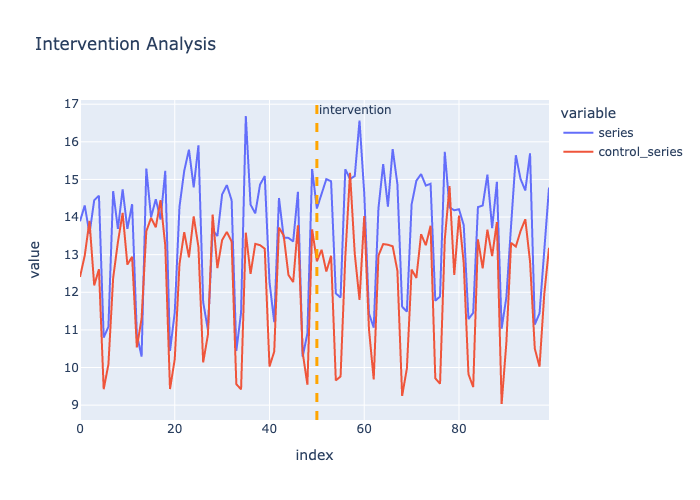

In [10]:
"""
Only season, no trend
"""

series_season_only = series * season_multiplier
control_series_season_only = control_series * season_multiplier

experiment_season_only = ControlledInterventionSeries(
    series_season_only, control_series_season_only, split
)

experiment_season_only.plot()

In [11]:
experiment_season_only.report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 13.517758231645292, After: 13.85635518753675

The means of control-series before and after intervention are
	Before: 12.374021734023001, After: 12.270002536715491

The mean difference of the series and control-series before and after is
	Before: 1.1437364976222895, After: 1.5863526508212562.

The mean ratio of the series and control-series before and after is
	Before: 1.0945466284944954, After: 1.134990023826841.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 0.3096798477172674, Control Series: 0.7455770586035525, Difference: 0.013473946241024713, Ratio: 0.00877675059754353.

___________________
Rsults from ANCOVA:

           Source          SS  DF           F         p-unc       np2
0    intervention    4.635060   1    6.195659  1.450913e-02  0.060038
1  control_series  196.785473   1  263.04206

In [12]:
"""
Same with adding season flag as covariate
"""

ControlledInterventionSeries(
    series_season_only, control_series_season_only, split, covariates=[season_flag]
).report()


___________________
Data Statistics

The means of series before and after intervention are
	Before: 13.517758231645292, After: 13.85635518753675

The means of control-series before and after intervention are
	Before: 12.374021734023001, After: 12.270002536715491

The mean difference of the series and control-series before and after is
	Before: 1.1437364976222895, After: 1.5863526508212562.

The mean ratio of the series and control-series before and after is
	Before: 1.0945466284944954, After: 1.134990023826841.
___________________
Results from ttest:

The p-values for significance of differences in means before and after intervention are
	Series: 0.3096798477172674, Control Series: 0.7455770586035525, Difference: 0.013473946241024713, Ratio: 0.00877675059754353.

___________________
Rsults from ANCOVA:

           Source         SS  DF          F         p-unc       np2
0    intervention   2.944905   1   6.704627  1.111158e-02  0.065281
1  control_series   0.118728   1   0.270306  6.0